<a href="https://colab.research.google.com/github/MariaGabrielaAlvesZuppardo/SeriesTemporaisCin/blob/main/Lista_de_Exercicio_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading the database and installing the necessary libraries

In [51]:
!pip install yfinance

In [53]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [ ]:
ticket = "BTC-USD"
dados = yf.download(ticket,start="2007-08-18",end="2025-08-18")
dados_weekly= dados['Close'].resample('W').last().dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(type(dados_weekly))  # Deve ser <class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>


### Random Walk com ruído

In [ ]:
np.random.seed(42)
random_walk = np.cumsum(np.random.normal(0, 100, len(dados_weekly)))

In [ ]:
# Criando DataFrame para armazenar os dados
dados_rw = pd.DataFrame({
    'Close': dados_weekly.values.squeeze(),  # Convertendo para 1D
    'Random Walk': random_walk
}, index=dados_weekly.index)
dados_rw['Close RW'] = dados_rw['Close'] + dados_rw['Random Walk']

### Métricas de Avaliação

In [ ]:
media_rw = np.mean(dados_rw['Random Walk'])
desvio_padrao_rw = np.std(dados_rw['Random Walk'])
print(f"Média do Random Walk: {media_rw:.2f}")
print(f"Desvio Padrão do Random Walk: {desvio_padrao_rw:.2f}")

Média do Random Walk: -145.40
Desvio Padrão do Random Walk: 685.63


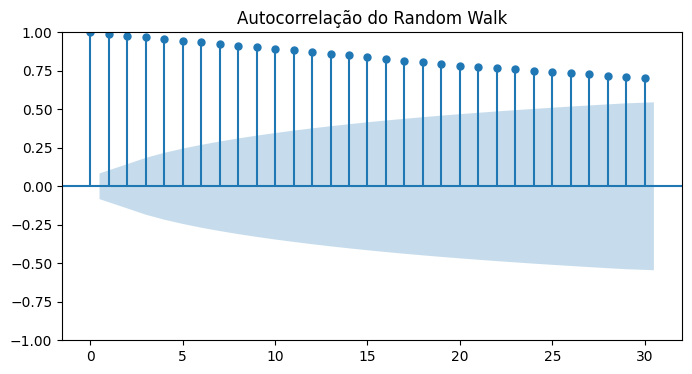

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sm.graphics.tsa.plot_acf(dados_rw['Random Walk'], lags=30, ax=ax)
plt.title("Autocorrelação do Random Walk")
plt.show()

### Teste de Dickey-Fuller (Estacionariedade)

In [ ]:
adf_teste = adfuller(dados_rw['Random Walk'])
print("\n🔹 Teste de Dickey-Fuller Aumentado (ADF)")
print(f"Estatística de Teste: {adf_teste[0]:.4f}")
print(f"p-valor: {adf_teste[1]:.4f}")

if adf_teste[1] > 0.05:
    print("❌ O Random Walk NÃO é estacionário (possui tendência).")
else:
    print("✅ O Random Walk é estacionário.")



🔹 Teste de Dickey-Fuller Aumentado (ADF)
Estatística de Teste: -1.4740
p-valor: 0.5463
❌ O Random Walk NÃO é estacionário (possui tendência).


### Gráficos

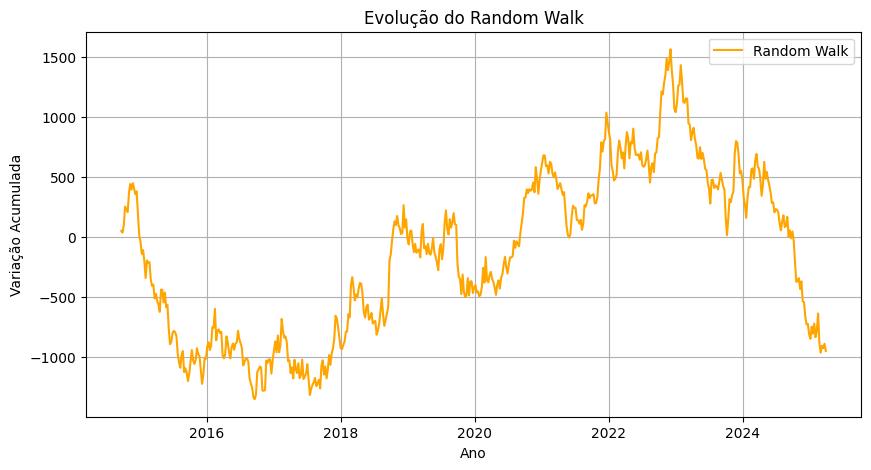

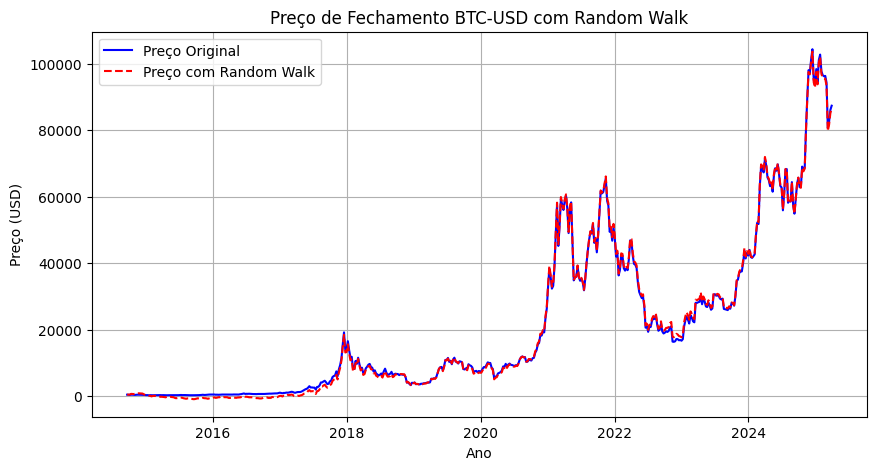

In [ ]:
# 1️⃣ Evolução do Random Walk
plt.figure(figsize=(10, 5))
plt.plot(dados_rw.index, dados_rw['Random Walk'], label="Random Walk", color='orange')
plt.title("Evolução do Random Walk")
plt.xlabel("Ano")
plt.ylabel("Variação Acumulada")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Preço de Fechamento Original vs. Random Walk Aplicado
plt.figure(figsize=(10, 5))
plt.plot(dados_rw.index, dados_rw['Close'], label="Preço Original", color='blue')
plt.plot(dados_rw.index, dados_rw['Close RW'], label="Preço com Random Walk", color='red', linestyle='dashed')
plt.title("Preço de Fechamento BTC-USD com Random Walk")
plt.xlabel("Ano")
plt.ylabel("Preço (USD)")
plt.legend()
plt.grid()
plt.show()

### ***Decomposição da Série Temporal***

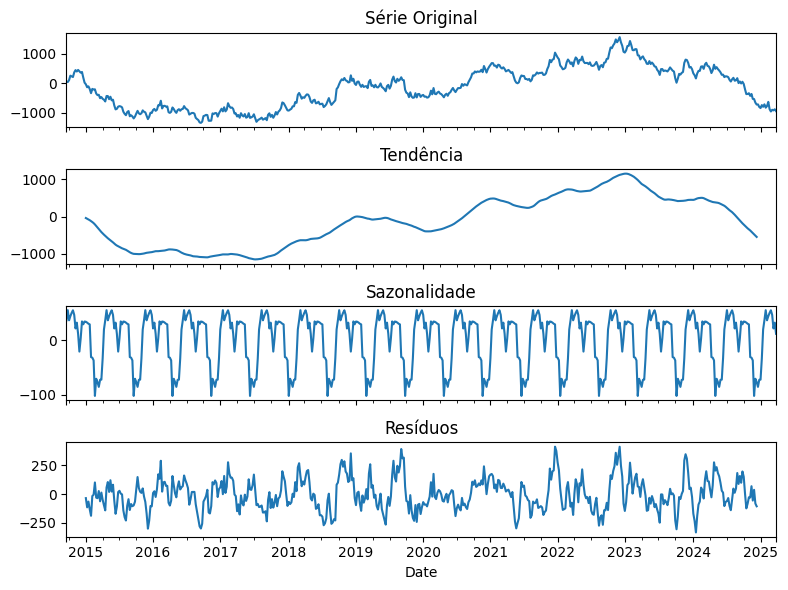

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados_rw["Random Walk"], period=30, model="additive")

fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
result.observed.plot(ax=axes[0], title="Série Original")
result.trend.plot(ax=axes[1], title="Tendência")
result.seasonal.plot(ax=axes[2], title="Sazonalidade")
result.resid.plot(ax=axes[3], title="Resíduos")

plt.tight_layout()
plt.show()

### Fazendo testes de períodos destintos :

- 2015 a 2025
- 2020 a 2025

### 2020 a 2025

In [54]:
ticket = "BTC-USD"
dados = yf.download(ticket,start="2020-08-18",end="2025-08-18")
dados_weekly= dados['Close'].resample('W').last().dropna()

[*********************100%***********************]  1 of 1 completed


### Random Walk com ruído

In [55]:
np.random.seed(42)
random_walk = np.cumsum(np.random.normal(0, 100, len(dados_weekly)))

In [57]:
# Criando DataFrame para armazenar os dados
dados_rw = pd.DataFrame({
    'Close': dados_weekly.values.squeeze(),  # Convertendo para 1D
    'Random Walk': random_walk
}, index=dados_weekly.index)
dados_rw['Close RW'] = dados_rw['Close'] + dados_rw['Random Walk']

### Métricas de avaliação

In [58]:
media_rw = np.mean(dados_rw['Random Walk'])
desvio_padrao_rw = np.std(dados_rw['Random Walk'])
print(f"Média do Random Walk: {media_rw:.2f}")
print(f"Desvio Padrão do Random Walk: {desvio_padrao_rw:.2f}")

Média do Random Walk: -682.82
Desvio Padrão do Random Walk: 455.55


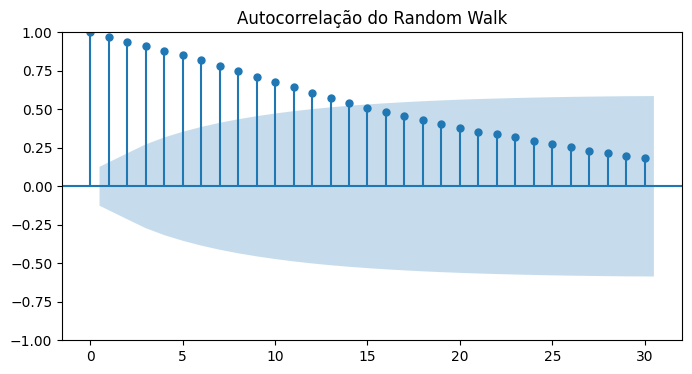

In [59]:
fig, ax = plt.subplots(figsize=(8, 4))
sm.graphics.tsa.plot_acf(dados_rw['Random Walk'], lags=30, ax=ax)
plt.title("Autocorrelação do Random Walk")
plt.show()

### Teste de Dickey-Fuller (Estacionariedade)

In [60]:
adf_teste = adfuller(dados_rw['Random Walk'])
print("\n🔹 Teste de Dickey-Fuller Aumentado (ADF)")
print(f"Estatística de Teste: {adf_teste[0]:.4f}")
print(f"p-valor: {adf_teste[1]:.4f}")

if adf_teste[1] > 0.05:
    print("❌ O Random Walk NÃO é estacionário (possui tendência).")
else:
    print("✅ O Random Walk é estacionário.")


🔹 Teste de Dickey-Fuller Aumentado (ADF)
Estatística de Teste: -1.8305
p-valor: 0.3654
❌ O Random Walk NÃO é estacionário (possui tendência).


### Gráficos

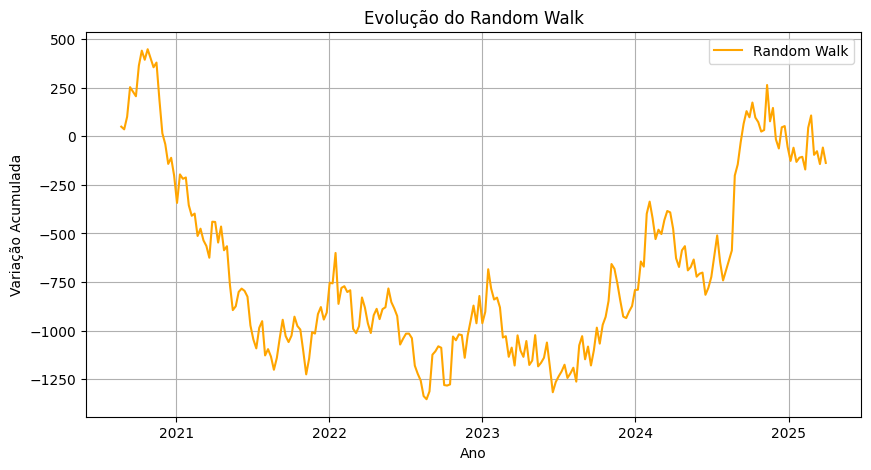

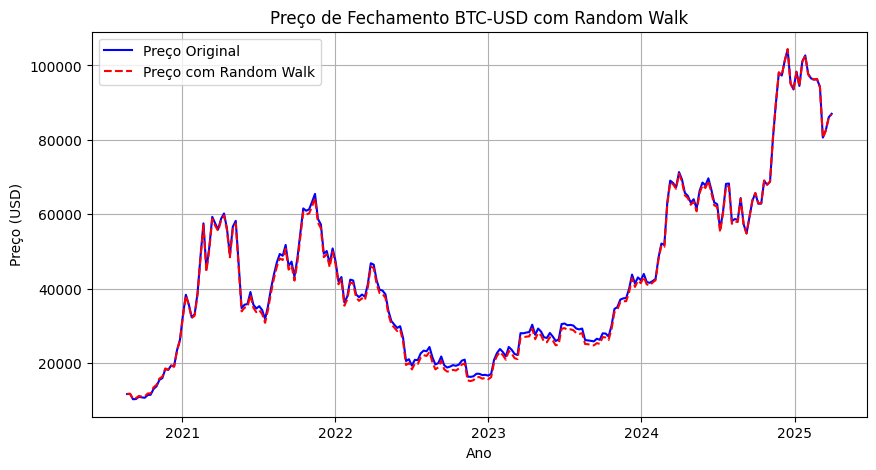

In [61]:
# 1️⃣ Evolução do Random Walk
plt.figure(figsize=(10, 5))
plt.plot(dados_rw.index, dados_rw['Random Walk'], label="Random Walk", color='orange')
plt.title("Evolução do Random Walk")
plt.xlabel("Ano")
plt.ylabel("Variação Acumulada")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Preço de Fechamento Original vs. Random Walk Aplicado
plt.figure(figsize=(10, 5))
plt.plot(dados_rw.index, dados_rw['Close'], label="Preço Original", color='blue')
plt.plot(dados_rw.index, dados_rw['Close RW'], label="Preço com Random Walk", color='red', linestyle='dashed')
plt.title("Preço de Fechamento BTC-USD com Random Walk")
plt.xlabel("Ano")
plt.ylabel("Preço (USD)")
plt.legend()
plt.grid()
plt.show()

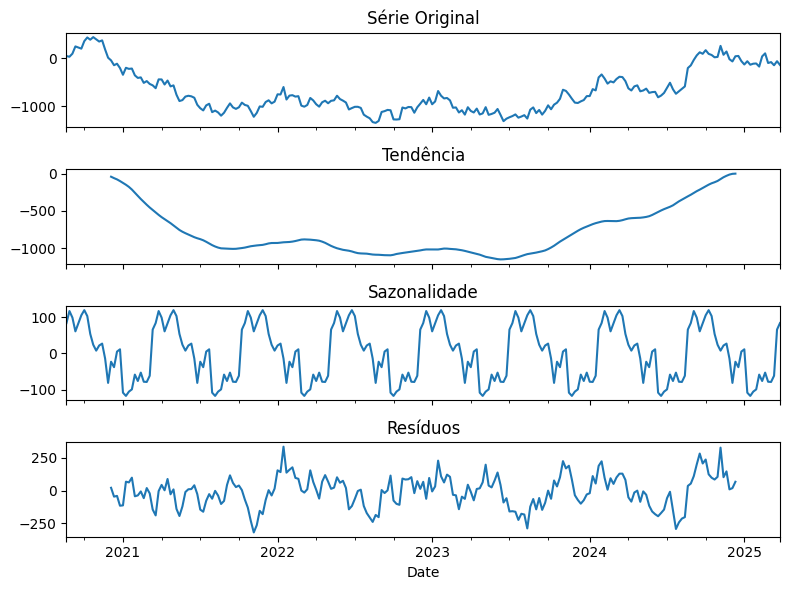

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados_rw["Random Walk"], period=30, model="additive")

fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
result.observed.plot(ax=axes[0], title="Série Original")
result.trend.plot(ax=axes[1], title="Tendência")
result.seasonal.plot(ax=axes[2], title="Sazonalidade")
result.resid.plot(ax=axes[3], title="Resíduos")

plt.tight_layout()
plt.show()

### ***2015 a 2025***

In [63]:
ticket = "BTC-USD"
dados = yf.download(ticket,start="2015-08-18",end="2025-08-18")
dados_weekly= dados['Close'].resample('W').last().dropna()

[*********************100%***********************]  1 of 1 completed


### Random Walk

In [64]:
np.random.seed(42)
random_walk = np.cumsum(np.random.normal(0, 100, len(dados_weekly)))

In [65]:
# Criando DataFrame para armazenar os dados
dados_rw = pd.DataFrame({
    'Close': dados_weekly.values.squeeze(),  # Convertendo para 1D
    'Random Walk': random_walk
}, index=dados_weekly.index)
dados_rw['Close RW'] = dados_rw['Close'] + dados_rw['Random Walk']

### Métricas de avaliação

In [66]:
media_rw = np.mean(dados_rw['Random Walk'])
desvio_padrao_rw = np.std(dados_rw['Random Walk'])
print(f"Média do Random Walk: {media_rw:.2f}")
print(f"Desvio Padrão do Random Walk: {desvio_padrao_rw:.2f}")

Média do Random Walk: -134.57
Desvio Padrão do Random Walk: 701.13


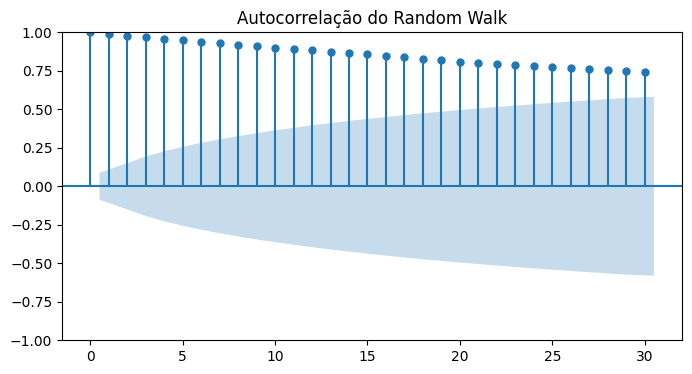

In [67]:
fig, ax = plt.subplots(figsize=(8, 4))
sm.graphics.tsa.plot_acf(dados_rw['Random Walk'], lags=30, ax=ax)
plt.title("Autocorrelação do Random Walk")
plt.show()

### Teste de Dickey-Fuller (Estacionariedade)

In [68]:
adf_teste = adfuller(dados_rw['Random Walk'])
print("\n🔹 Teste de Dickey-Fuller Aumentado (ADF)")
print(f"Estatística de Teste: {adf_teste[0]:.4f}")
print(f"p-valor: {adf_teste[1]:.4f}")

if adf_teste[1] > 0.05:
    print("❌ O Random Walk NÃO é estacionário (possui tendência).")
else:
    print("✅ O Random Walk é estacionário.")


🔹 Teste de Dickey-Fuller Aumentado (ADF)
Estatística de Teste: -1.3937
p-valor: 0.5853
❌ O Random Walk NÃO é estacionário (possui tendência).


### Gráficos

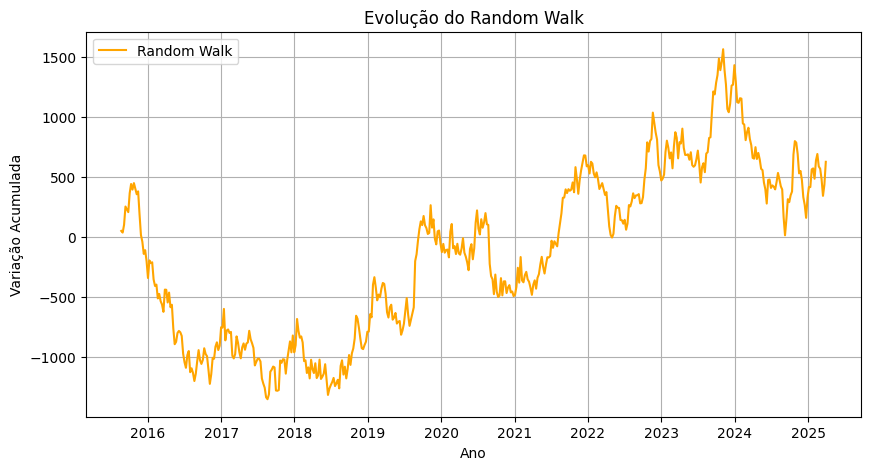

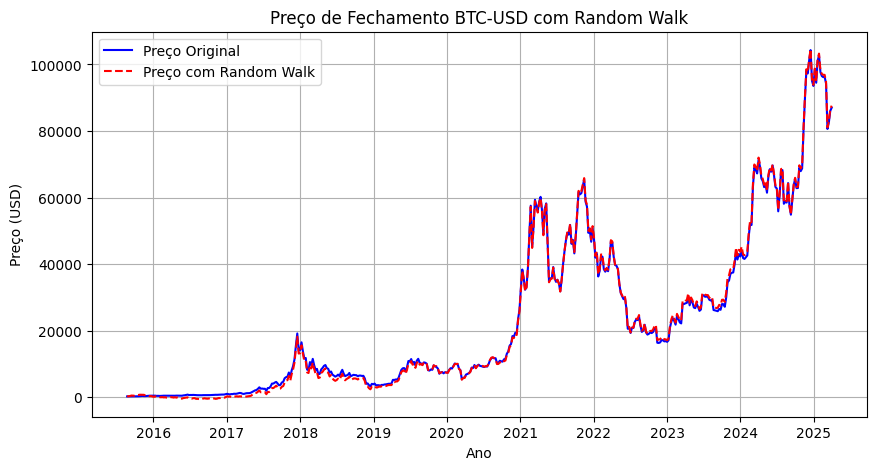

In [69]:
# 1️⃣ Evolução do Random Walk
plt.figure(figsize=(10, 5))
plt.plot(dados_rw.index, dados_rw['Random Walk'], label="Random Walk", color='orange')
plt.title("Evolução do Random Walk")
plt.xlabel("Ano")
plt.ylabel("Variação Acumulada")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Preço de Fechamento Original vs. Random Walk Aplicado
plt.figure(figsize=(10, 5))
plt.plot(dados_rw.index, dados_rw['Close'], label="Preço Original", color='blue')
plt.plot(dados_rw.index, dados_rw['Close RW'], label="Preço com Random Walk", color='red', linestyle='dashed')
plt.title("Preço de Fechamento BTC-USD com Random Walk")
plt.xlabel("Ano")
plt.ylabel("Preço (USD)")
plt.legend()
plt.grid()
plt.show()

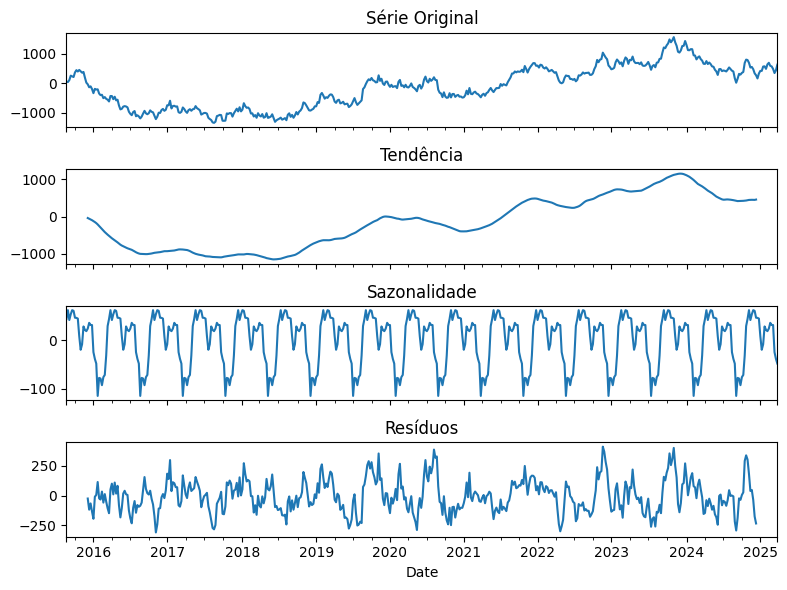

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados_rw["Random Walk"], period=30, model="additive")

fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
result.observed.plot(ax=axes[0], title="Série Original")
result.trend.plot(ax=axes[1], title="Tendência")
result.seasonal.plot(ax=axes[2], title="Sazonalidade")
result.resid.plot(ax=axes[3], title="Resíduos")

plt.tight_layout()
plt.show()